In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string

### Web Scraping

In [2]:
website_url = requests.get('https://english.onlinekhabar.com/supreme-court-panel-reports-rampant-corruption-in-judiciary-that-begins-with-justice-selection.html')
soup = BeautifulSoup(website_url.text,'lxml')

In [3]:
def write_text_into_file(title, data):
    filename = "dataset/" + title + ".txt"
    f = open(filename, 'w+', encoding="utf-8")
    f.write(data)
    f.close()
    print("Text file " + filename + " created")

In [4]:
text = soup.findAll(['p','h4'])

In [5]:
records=[]

In [6]:
for result in text:
    tex = result.text # result not results
    records.append(tex)

In [7]:
records = records[1:-6]

In [8]:
temp = ' '.join(word for word in records)

In [9]:
write_text_into_file("Supreme",temp)

Text file dataset/Supreme.txt created


In [10]:
website_url_1 = requests.get('https://english.onlinekhabar.com/rashil-palanchoke-banepa-green-initiatives.html')
soup_1 = BeautifulSoup(website_url_1.text,'lxml')

In [11]:
text_1 = soup_1.findAll(['p','h4'])
records_1=[]

for result in text_1:
    tex_1 = result.text # result not results
    records_1.append(tex_1)


In [12]:
records_1=records_1[1:-6]

In [13]:
temp_1 = ' '.join(word for word in records_1)

In [14]:
write_text_into_file("Environment",temp_1)

Text file dataset/Environment.txt created


In [15]:
website_url_2 = requests.get('https://english.onlinekhabar.com/nepals-market-is-full-of-fake-coke-north-face-and-whatnot-its-unlikely-to-stop-soon.html')
soup_2 = BeautifulSoup(website_url_2.text,'lxml')

In [16]:
text_2 = soup_2.findAll(['p','h4'])
records_2=[]

for result in text_2:
    tex_2 = result.text # result not results
    records_2.append(tex_2)


In [17]:
records_2 = records_2[1:-6]

In [18]:
temp_2 = ' '.join(word for word in records_2)

In [19]:
write_text_into_file("Fake",temp_1)

Text file dataset/Fake.txt created


In [20]:
dataset = [temp,temp_1,temp_2]

### Preprocessing

In [22]:
def isNotStopWord(word):
    return word not in stopwords.words('english')

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
punctuations = string.punctuation+'”’“‘'

In [25]:
def remove_punc(text):
    text_nopunc = ''.join([char for char in text if char not in punctuations])
    return text_nopunc

In [26]:
def preprocessingText(text):
    sentences = nltk.sent_tokenize(text)
    tokens = []
    temp = ""
    
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        
        #Converting to LowerCase
        words = map(str.lower, words)
        
        # Remove stop words
        words = filter(lambda x: isNotStopWord(x), words)
        
        # Removing punctuations except '<.>/<?>/<!>'
        words = filter(lambda x:remove_punc(x),words)
        
        # Remove empty strings
        words = filter(lambda x: len(x) > 0, words)
      
        tokens = tokens + list(words)
        temp = ' '.join(word for word in tokens)
        
    return temp

In [27]:
pre=preprocessingText(temp)

In [28]:
pre

'team commissioned chief justice cholendra shamsher rana reported corruption irregularities rampant country judiciary claims corruption begins selection appointment justices judges courts team led supreme court justice hari krishna karki submitted report cj rana thursday nepal bar association president chandeshwar shrestha member team says team suggested judicial leadership make reforms willing enough around-250-page report identified existing justice appointment process significant factor behind corruption judiciary judicial council responsible recommending names justices judges council picks names pleases without basing legally defined criteria hence justice appointment gets controversial time member team quotes report justices acting brokers report claims middlemen brokers found influencing administrative affairs courts transfer judges also found working establish regular communications justices parties fighting case. report claims justices advocates also working middlemen hence cou

### Subject, Object and Relationship

In [29]:
import spacy

In [30]:
# load english language model
nlp = spacy.load('en_core_web_sm')

In [31]:
def get_entities(sent):  
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

    for tok in nlp(sent):
        
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            
        # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier +" "+ prefix + " "+ tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""      

      ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text

    return [ent1.strip(), ent2.strip()]

In [32]:
get_entities("Ram  done  homework")

['Ram', 'homework']

In [33]:
from spacy.matcher import Matcher 
from spacy.tokens import Span

In [34]:
def get_relation(sent):
    
    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [[{'DEP':'ROOT'}], 
            [{'DEP':'prep','OP':"?"}],
            [{'DEP':'agent','OP':"?"}],  
            [{'POS':'ADJ','OP':"?"}] ]

    matcher.add("matching_1", pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [35]:
get_relation("I have completed the task")

'completed'

In [36]:
entity_pairs = []
relations = []

for news in dataset:
    
    sentences = nltk.sent_tokenize(news)
    data = pd.DataFrame(sentences,columns=['Sentences'])
    data['Preprocessed'] = data['Sentences'].apply(lambda x:preprocessingText(x))
    data.head()
    for i in data["Preprocessed"]:

        entity_pairs.append(get_entities(i))

    for i in data["Preprocessed"]:

        relations.append(get_relation(i))

In [37]:
ner = pd.DataFrame(entity_pairs,columns=['subject','object'])
ner['edge']=relations

In [38]:
ner.drop(ner[ner.object == ''].index, inplace=True)
ner.drop(ner[ner.subject == ''].index, inplace=True)

In [39]:
ner.tail()

,subject,object,edge
186,seen department,district supreme court,goes
188,nepal laws,due decade verdict,take
189,reluctant business,foreign companies,companies
190,little punishment,trade mark 1965,drafted
192,enough law,"100,000 confiscation items",fine


In [40]:
ner=ner.reset_index(drop=True)

In [41]:
ner.tail()

,subject,object,edge
122,seen department,district supreme court,goes
123,nepal laws,due decade verdict,take
124,reluctant business,foreign companies,companies
125,little punishment,trade mark 1965,drafted
126,enough law,"100,000 confiscation items",fine


In [42]:
ner.head(10)

,subject,object,edge
0,cholendra shamsher rana,corruption irregularities,rampant
1,selection appointment justices,courts,begins
2,court justice hari,submitted rana,led
3,around-250 page report,significant corruption judiciary,behind
4,recommending names council,defined names criteria,without
5,controversial time member team,report,controversial
6,administrative affairs courts,judges,administrative
7,hence court administration,also middlemen,claims
8,council kp,sharma oli premiership,made
9,members,hence justice controversy team,chief


In [43]:
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(ner, "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/home/sid/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sid/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


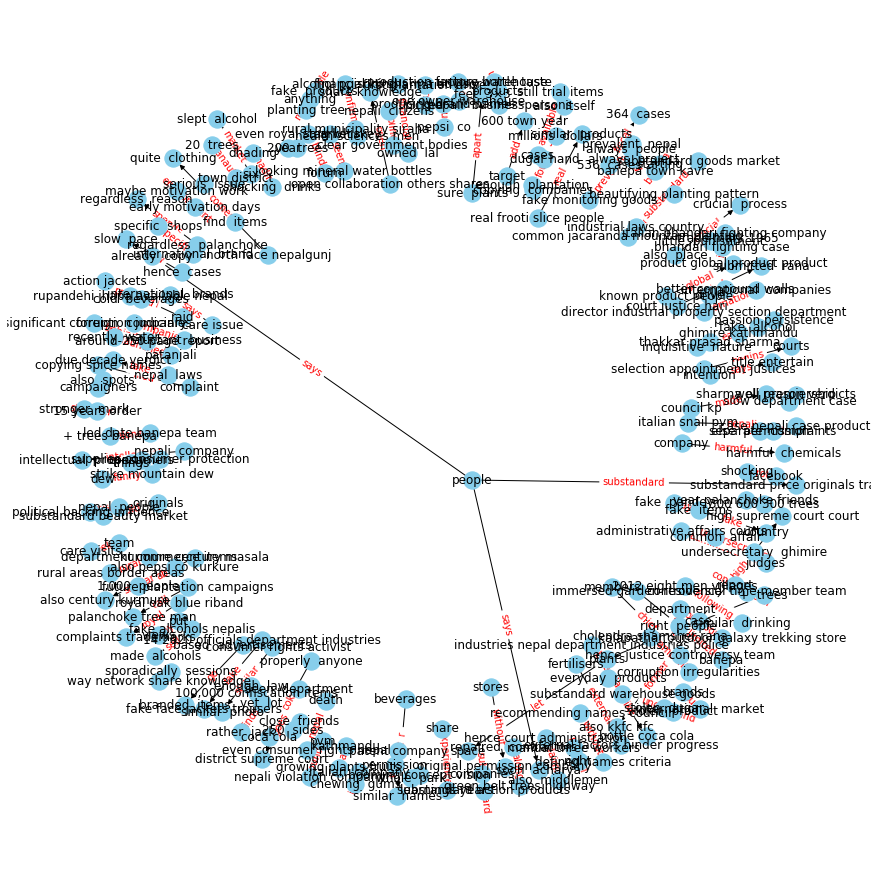

In [45]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'edge')
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()

In [46]:
ner['edge'].value_counts()

says              8
substandard       4
without           4
similar           3
fake              3
                 ..
undersecretary    1
aware             1
harmful           1
take              1
understand        1
Name: edge, Length: 102, dtype: int64

### look into specific edges to view clearly

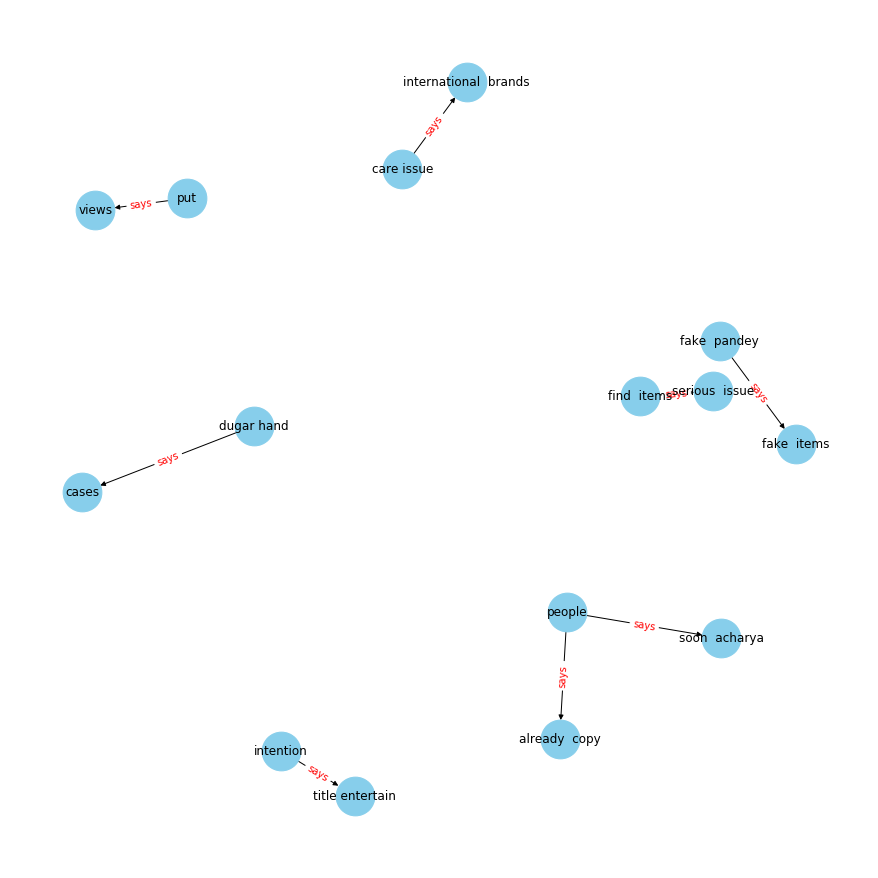

In [47]:
G=nx.from_pandas_edgelist(ner[ner['edge']=="says"], "subject", "object", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'edge')
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()

#### also tried to get subject object and relationship triplets using textacy 

In [48]:
TEXTS =dataset

In [49]:
TEXTS

['A team commissioned by Chief Justice Cholendra Shamsher Rana has reported that corruption and irregularities are rampant in the country’s judiciary. Further, it claims corruption begins with the selection and appointment of justices and judges at courts. The team led by Supreme Court Justice Hari Krishna Karki submitted its report to CJ Rana on Thursday. Nepal Bar Association President Chandeshwar Shrestha, a member of the team, says the team has suggested the judicial leadership can make reforms if it is willing enough to do so.  The around-250-page report has identified the existing justice appointment process as the most significant factor behind corruption in the judiciary. “The Judicial Council is responsible for recommending names of justices and judges, but the council picks the names as it pleases without basing it on any legally defined criteria. Hence, the justice appointment gets controversial most of the time,” a member of the team quotes the report. ‘Some justices can be

In [50]:
import textacy
from textacy.extract import subject_verb_object_triples

In [51]:
doc = nlp('They are watching a movie')
iterator = subject_verb_object_triples(doc)

for it in iterator:
    print(it[1])

[are, watching]


In [52]:
check = nltk.sent_tokenize(TEXTS[1])

In [53]:
triples_row = []
for p in check:
    pa= preprocessingText(p)
    iterator = subject_verb_object_triples(nlp(pa))
    phrase_triple = []
    for svo in iterator:
        phrase_triple.append(svo)
    triples_row.append(phrase_triple)

In [54]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus.reader.wordnet import VERB

In [55]:
lemmatizer = WordNetLemmatizer()

In [91]:
lemmatized_triples = []
lemmatized_stemmed_triples = []

In [57]:
stemmer = SnowballStemmer("english")

In [58]:
def lemmatize_stem(text):
    return stemmer.stem(lemmatizer.lemmatize(text))

In [92]:
phrase_counter = 0
found_triples_counter = 0

In [93]:
for (phrase, phrase_triplets) in zip(check,triples_row):
    print("phrase triples:",phrase_triplets)
    
    if len(phrase)>0:
        phrase_counter+=1
    if phrase_triplets:
        found_triples_counter+=1
        
        for triple in phrase_triplets:
            print("raw triplets:",triple)
            
            s = []
            for i in triple[0]:
                print(i)
                s_i = lemmatizer.lemmatize(str(i))
                s.append(s_i.lower())
            o = []
            for i in triple[2]:
                o_i = lemmatizer.lemmatize(str(i))
                o.append(o_i.lower())
            v = []
            for i in triple[1]:    
                v_i = lemmatizer.lemmatize(str(i),VERB)
                v.append(v_i.lower())
            
            lss = []
            for i in triple[0]:
                print(i)
                s_i = lemmatize_stem(str(i))
                lss.append(s_i.lower())
            
            lso = []
            for i in triple[2]:
                o_i = lemmatize_stem(str(i))
                lso.append(o_i.lower())
            
            lsv = []
            for i in triple[1]:    
                v_i = lemmatize_stem(str(i))
                lsv.append(v_i.lower())
            
            print("lemmatized: s:", s, ", o:", o, ", v:", v)
            print("lemmatizedstemmed: s:", lss, ", o:", lso, ", v:",lsv)
            
            lemmatized_triples.append([s,v,o])
            lemmatized_stemmed_triples.append([lss,lsv[-1],lso])
            
        else:
            print("Could not detect Triplets in phrase", phrase)
            lemmatized_triples.append([])
            lemmatized_stemmed_triples.append([])

phrase triples: [SVOTriple(subject=[nature], verb=[turned], object=[passion, persistence])]
raw triplets: SVOTriple(subject=[nature], verb=[turned], object=[passion, persistence])
nature
nature
lemmatized: s: ['nature'] , o: ['passion', 'persistence'] , v: ['turn']
lemmatizedstemmed: s: ['natur'] , o: ['passion', 'persist'] , v: ['turn']
Could not detect Triplets in phrase What began with his inquisitive nature turned into a passion and now with his persistence, he is starting to make a mark in society.
phrase triples: [SVOTriple(subject=[starting, palanchoke, shares], verb=[started], object=[project])]
raw triplets: SVOTriple(subject=[starting, palanchoke, shares], verb=[started], object=[project])
starting
palanchoke
shares
starting
palanchoke
shares
lemmatized: s: ['starting', 'palanchoke', 'share'] , o: ['project'] , v: ['start']
lemmatizedstemmed: s: ['start', 'palanchok', 'share'] , o: ['project'] , v: ['start']
Could not detect Triplets in phrase Starting out Palanchoke shares h

In [94]:
sources = []
relations = []
targets = []

In [95]:
for ep_item in lemmatized_stemmed_triples:
    
    if ep_item:
        print(ep_item)
        sources.append(ep_item[0])
        relations.append(ep_item[1])
        targets.append(ep_item[2])

[['natur'], 'turn', ['passion', 'persist']]
[['start', 'palanchok', 'share'], 'start', ['project']]
[['contractor'], 'plan', ['tree', 'plant']]
[['friend'], 'collect', ['money']]
[['date', 'banepa', 'team'], 'plant', ['tree', 'banepa']]
[['target'], 'add', ['town', 'year']]
[['plantat', 'drive'], 'run', ['reason']]
[['precious'], 'get', ['water']]
[['plant'], 'need', ['space']]
[['differ', 'plant'], 'choos', ['drive']]
[['govern'], 'set', ['plantat']]
[['fruit'], 'choos', ['tree']]
[['plant'], 'prioritis', ['space', 'plant', 'pattern']]
[['plantat', 'campaign'], 'call', ['tree', 'man']]
[['intent'], 'get', ['titl', 'entertain']]
[['lot'], 'deserv', ['titl']]
[['pick'], 'remind', ['age', '15/16']]
[['pick'], 'done', ['plantat', 'drive']]
[['matatirtha', 'forest'], 'collect', ['student']]
[['matatirtha', 'forest'], 'plant', ['tree']]
[['kathmandu'], 'recal', ['rooftop', 'plant', 'fruit']]
[['one'], 'find', ['banepa']]
[['student', 'kathmandu', 'univers', 'enthusiast'], 'join', ['u']]
[['

In [96]:
kg_df = pd.DataFrame({'source':sources,'target':targets,'edge':relations})

In [103]:
kg_df.tail()

,source,target,edge
36,[year],"[dig, 200, tree, plant]",done
37,[vision],[town],make
38,[team],"[care, tree]",take
39,"[other, share]","[share, experi, knowledg]",love
40,[palanchok],"[get, banepa, green, initi, regist]",want


In [104]:
main=kg_df.explode('source').reset_index(drop=True)


In [105]:
main.tail()

,source,target,edge
54,vision,[town],make
55,team,"[care, tree]",take
56,other,"[share, experi, knowledg]",love
57,share,"[share, experi, knowledg]",love
58,palanchok,"[get, banepa, green, initi, regist]",want


In [106]:
main = main.explode('target').reset_index(drop=True)

In [107]:
main.tail()

,source,target,edge
91,palanchok,get,want
92,palanchok,banepa,want
93,palanchok,green,want
94,palanchok,initi,want
95,palanchok,regist,want


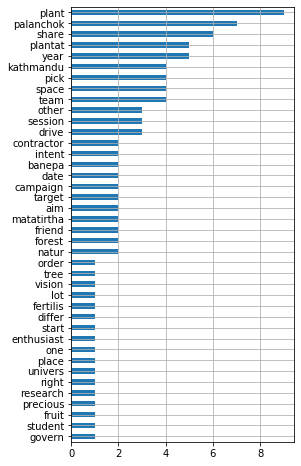

In [108]:
main.source.value_counts().sort_values().plot.barh(figsize=(4,8),grid=True)

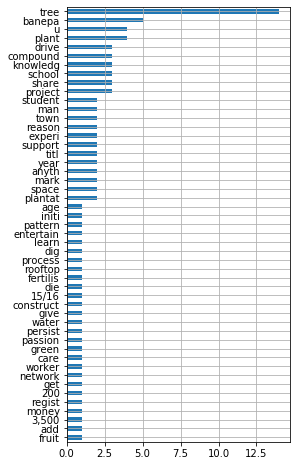

In [109]:
main.target.value_counts().sort_values().plot.barh(figsize=(4,8),grid=True)

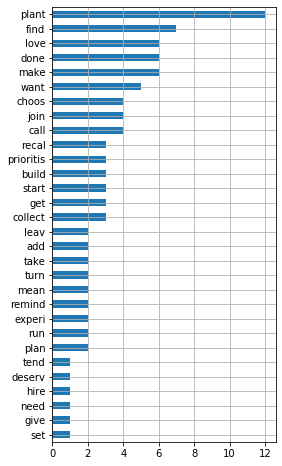

In [110]:
main.edge.value_counts().sort_values().plot.barh(figsize=(4,8),grid=True)

/home/sid/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sid/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


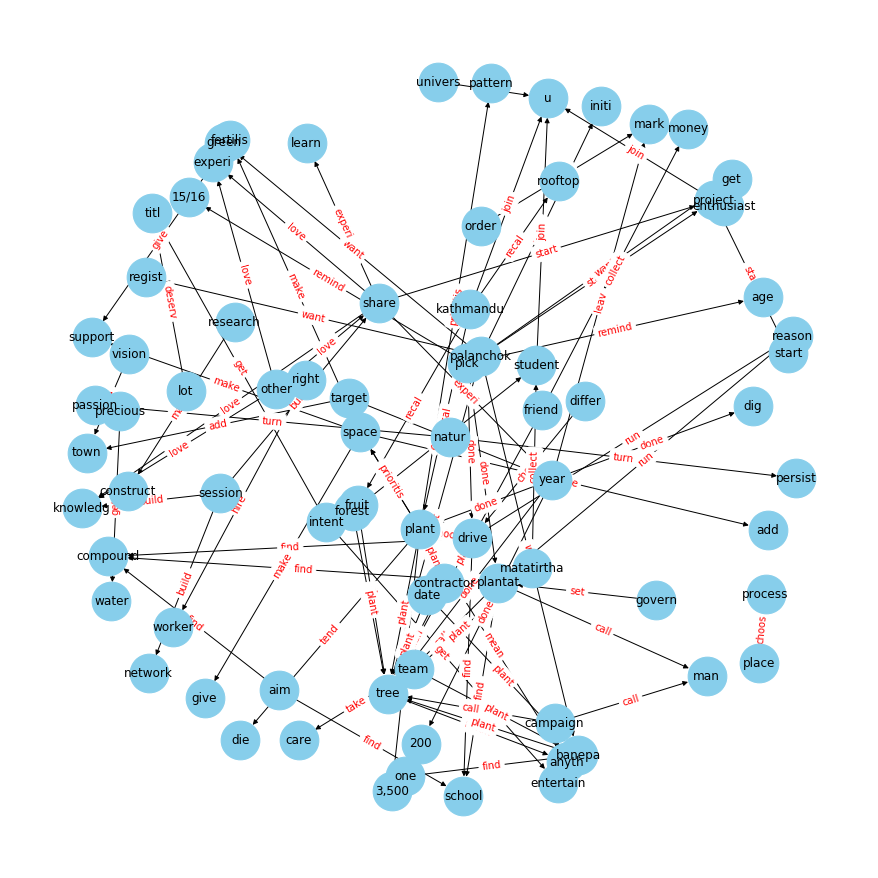

In [111]:
G=nx.from_pandas_edgelist(main, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
edge_labels = nx.get_edge_attributes(G,'edge')
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()

### Depth First Search via NetworkX

In [112]:
selected_nodes = [n for (n,v,e) in G.edges(data=True) if (e['edge'] in ['find','love','done'])]

In [113]:
SG = G.subgraph(selected_nodes)

In [114]:
ax_SG = nx.dfs_tree(SG, source='share',depth_limit=1)

In [115]:
len(list(ax_SG.edges()))

1

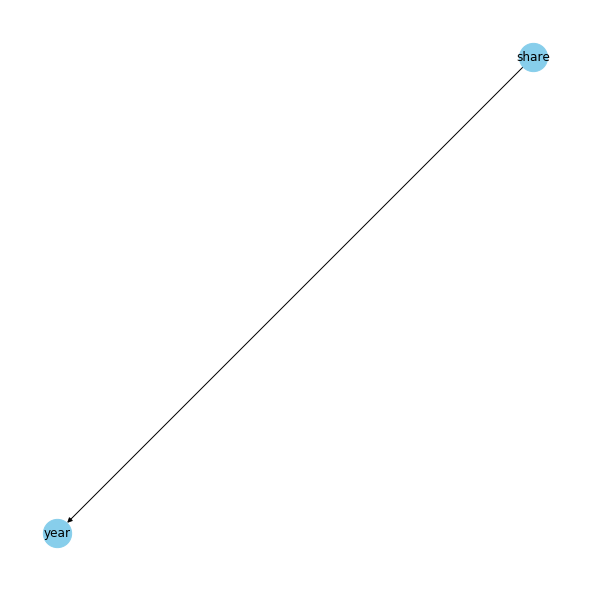

In [118]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(ax_SG,k=0.5)
nx.draw(ax_SG,with_labels=True, node_color='skyblue',node_size=800,edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

In [119]:
ax_SG = nx.dfs_tree(SG, source='share',depth_limit=3)

In [120]:
len(list(ax_SG.edges()))

1

#### actually it should have found more egdes but in my dataset since there is not much depth so it didn't make any effect

In [151]:
def give_answer(question):
    
    pa= preprocessingText(question)
    iterator = subject_verb_object_triples(nlp(pa))
    phrase_triple = []
    for svo in iterator:
        phrase_triple.append(svo)
    
    if phrase_triple:
        lss = []
        for i in phrase_triple[0][0]:
            s_i = lemmatize_stem(str(i))
            lss.append(s_i.lower())
            
        lso = []
        for i in phrase_triple[0][2]:
            o_i = lemmatize_stem(str(i))
            lso.append(o_i.lower())
            
        lsv = []
        for i in phrase_triple[0][1]:    
            v_i = lemmatize_stem(str(i))
            lsv.append(v_i.lower())
                
        print("lemmatizedstemmed: s:", lss, ", o:", lso, ", v:",lsv[-1])
            
        return [lss,lsv[-1],lso]
            
    else:
        print("Could not detect Triplets in phrase", phrase)

In [160]:
s,v,o=give_answer("Starting out Palanchoke shares he started his project some 10 years ago when he shifted back to Banepa (a town in Kavre, some 25 km east of Kathmandu) from Kathmandu")

lemmatizedstemmed: s: ['start', 'palanchok', 'share'] , o: ['project'] , v: start
